In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
# 한글폰트 출력 가능 코드
from matplotlib import rc
rc('font', family='AppleGothic') # Mac Os
#rc('font', family='NanumGothic') # Windows Os
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [13]:
# 삼성전자, 하이닉스, 네이버, 카카오 KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','000660.KS','035420.KS','035720.KS','^KS11'}, '2021-12-01', '2022-01-21')

stock_price

[*********************100%***********************]  5 of 5 completed


Adj Close                                             \
                000660.KS     005930.KS     035420.KS      035720.KS   
Date                                                                   
2021-12-01  115092.867188  74065.523438  389491.81250  122442.796875   
2021-12-02  118550.593750  75459.234375  397980.75000  122442.796875   
2021-12-03  116574.750000  75260.132812  401476.18750  123442.335938   
2021-12-06  117068.710938  75956.984375  391489.21875  120943.500000   
2021-12-07  120032.476562  77052.039062  390490.53125  120443.734375   
2021-12-08  118550.593750  77052.039062  394485.31250  120943.500000   
2021-12-09  122008.320312  77848.445312  398979.43750  122442.796875   
2021-12-10  119044.554688  76554.289062  394485.31250  122442.796875   
2021-12-13  120032.476562  76454.734375  389991.15625  119943.968750   
2021-12-14  119538.515625  76653.835938  391489.21875  118444.664062   
2021-12-15  122008.320312  77251.140625  386995.09375  118444.664062   
2021-12-16  122502.281250  77450.242188  386995.09375  119444.203125   
2021-12-17  120526.437500  77649.343750  383999.00000  117445.132812   
2021-12-20  119044.554688  76753.390625  372513.96875  112947.234375   
2021-12-21  122996.242188  77748.890625  374511.37500  114446.531250   
2021-12-22  125466.039062  79043.046875  378006.81250  114446.531250   
2021-12-23  125960.000000  79540.796875  377507.46875  112947.234375   
2021-12-24  126453.960938  80138.101562  383499.65625  114446.531250   
2021-12-27  124478.117188  79839.453125  380004.18750  112947.234375   
2021-12-28  125960.000000  79939.000000  383999.00000  113447.000000   
2021-12-29  127000.000000  78800.000000  382000.00000  114000.000000   
2021-12-30  131000.000000  78300.000000  378500.00000  112500.000000   
2022-01-04  128500.000000  78700.000000  365500.00000  111500.000000   
2022-01-05  125500.000000  77400.000000  355000.00000  105500.000000   
2022-01-06  125000.000000  76900.000000  338500.00000  100000.000000   
2022-01-07  127000.000000  78300.000000  338000.00000  100000.000000   
2022-01-10  124500.000000  78000.000000  335000.00000   96600.000000   
2022-01-11  128000.000000  78900.000000  335000.00000   95000.000000   
2022-01-12  128500.000000  78900.000000  345500.00000   97200.000000   
2022-01-13  129500.000000  77900.000000  348000.00000   96700.000000   
2022-01-14  128500.000000  77300.000000  342000.00000   93900.000000   
2022-01-17  127000.000000  77500.000000  343500.00000   92900.000000   
2022-01-18  126500.000000  77000.000000  338000.00000   92000.000000   
2022-01-19  127000.000000  76300.000000  332500.00000   90400.000000   
2022-01-20  125000.000000  76500.000000  335000.00000   92300.000000   

                            Close                                             \
                  ^KS11 000660.KS 005930.KS 035420.KS 035720.KS        ^KS11   
Date                                                                           
2021-12-01  2899.719971  116500.0   74400.0  390000.0  122500.0  2899.719971   
2021-12-02  2945.270020  120000.0   75800.0  398500.0  122500.0  2945.270020   
2021-12-03  2968.330078  118000.0   75600.0  402000.0  123500.0  2968.330078   
2021-12-06  2973.250000  118500.0   76300.0  392000.0  121000.0  2973.250000   
2021-12-07  2991.719971  121500.0   77400.0  391000.0  120500.0  2991.719971   
2021-12-08  3001.800049  120000.0   77400.0  395000.0  121000.0  3001.800049   
2021-12-09  3029.570068  123500.0   78200.0  399500.0  122500.0  3029.570068   
2021-12-10  3010.229980  120500.0   76900.0  395000.0  122500.0  3010.229980   
2021-12-13  3001.659912  121500.0   76800.0  390500.0  120000.0  3001.659912   
2021-12-14  2987.949951  121000.0   77000.0  392000.0  118500.0  2987.949951   
2021-12-15  2989.389893  123500.0   77600.0  387500.0  118500.0  2989.389893   
2021-12-16  3006.409912  124000.0   77800.0  387500.0  119500.0  3006.409912   
2021-12-17  3017.729980  122000.0   78000.0  384500.0  117500.0  3017.729980   

In [14]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35 entries, 2021-12-01 to 2022-01-20
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, 000660.KS)  35 non-null     float64
 1   (Adj Close, 005930.KS)  35 non-null     float64
 2   (Adj Close, 035420.KS)  35 non-null     float64
 3   (Adj Close, 035720.KS)  35 non-null     float64
 4   (Adj Close, ^KS11)      35 non-null     float64
 5   (Close, 000660.KS)      35 non-null     float64
 6   (Close, 005930.KS)      35 non-null     float64
 7   (Close, 035420.KS)      35 non-null     float64
 8   (Close, 035720.KS)      35 non-null     float64
 9   (Close, ^KS11)          35 non-null     float64
 10  (High, 000660.KS)       35 non-null     float64
 11  (High, 005930.KS)       35 non-null     float64
 12  (High, 035420.KS)       35 non-null     float64
 13  (High, 035720.KS)       35 non-null     float64
 14  (High, ^KS11)           

## 1. 다중회귀분석

In [23]:
# 필요한 라이브러리
import statsmodels.api as sm

# target은 종속변수, feature는 독립변수와 같다.
target = stock_price['Adj Close']['^KS11']
feature1 = stock_price['Adj Close'][{'005930.KS', '000660.KS','035420.KS','035720.KS'}]
feature2 = stock_price['Volume'][{'005930.KS', '000660.KS','035420.KS','035720.KS'}]
feature = pd.concat([feature1, feature2], axis=1)

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
# feature_add

/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_33478/516953027.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  feature1 = stock_price['Adj Close'][{'005930.KS', '000660.KS','035420.KS','035720.KS'}]
/var/folders/1v/ctxpzb994v98h43xyk972tmc0000gn/T/ipykernel_33478/516953027.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  feature2 = stock_price['Volume'][{'005930.KS', '000660.KS','035420.KS','035720.KS'}]


In [24]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     25.63
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.86e-10
Time:                        15:45:04   Log-Likelihood:                -146.31
No. Observations:                  35   AIC:                             310.6
Df Residuals:                      26   BIC:                             324.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        759.7091    256.853      2.958      0.007     231.740    1287.678
005930.KS      0.0196      0.004      4.543      0.000       0.011       0.028
035420.KS      0.0009      0.001      0.991      0.331      -0.001       0.003
035720.KS      0.0028      0.002      1.587      0.125      -0.001       0.006
000660.KS      0.0005      0.002      0.236      0.815      -0.004       0.004
005930.KS  -1.715e-06    1.4e-06     -1.221      0.233    -4.6e-06    1.17e-06
035420.KS   5.333e-05   3.01e-05      1.773      0.088   -8.49e-06       0.000
035720.KS  -1.069e-06   5.65e-06     -0.189      0.851   -1.27e-05    1.05e-05
000660.KS  -4.472e-07   5.03e-06     -0.089      0.930   -1.08e-05     9.9e-06
==============================================================================
Omnibus:                        1.140   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                0.979
Skew:                           0.390   Prob(JB):                        0.613
Kurtosis:                       2.752   Cond. No.                     1.31e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1-1 다중공선성 측정

In [25]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(feature)

,VIF Factor,features
0,10023.260801,005930.KS
1,8724.068978,035420.KS
2,5807.708820,000660.KS
3,3713.527663,035720.KS
4,43.553798,000660.KS
5,42.591362,005930.KS
6,36.065775,035420.KS
7,22.484355,035720.KS


In [30]:
# 다중공선성 측정
def vif_drop(x, cut_off):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # vif 10 초과시 drop을 위한 임계값 설정
    thresh = cut_off
    # Filter method로 feature selection 진행 후 최종 도출 될 데이터 프레임 형성
    output = pd.DataFrame()
    # 데이터의 컬럼 개수 설정
    k = x.shape[1]
    # VIF 측정
    vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    for i in range(1,k):
        print(f'{i}번째 VIF 측정')
        # VIF 최대 값 선정
        a = np.argmax(vif)
        print(f'Max VIF feature & value : {x.columns[a]}, {vif[a] : .4f}')
        # VIF 최대 값이 임계치를 넘지 않는 경우 break
        if (vif[a] <= thresh):
            print('\n')
            for q in range(output.shape[1]):
                print(f'{output.columns[q]}의 vif는 {vif[q] : .2f}입니다.')
            break
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        if (i == 1):
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        # VIF 최대 값이 임계치를 넘는 경우, + 1번째 이후 시도인 경우 : if 문으로 해당 feature 제거 후 다시 vif 측정
        elif (i > 1):
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

feature_drop = vif_drop(feature, 10)

1번째 VIF 측정
Max VIF feature & value : 005930.KS,  10023.2608
2번째 VIF 측정
Max VIF feature & value : 005930.KS,  7215.7067
3번째 VIF 측정
Max VIF feature & value : 035420.KS,  117.9883
4번째 VIF 측정
Max VIF feature & value : 005930.KS,  3.0227


035720.KS의 vif는  3.02입니다.
035720.KS의 vif는  3.02입니다.


In [32]:
import statsmodels.api as sm

# 다중공선성 제거후 모델 형성

feature = feature_drop

# sm OLS 적합
feature_add = sm.add_constant(feature, has_constant='add')

model = sm.OLS(target, feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     18.44
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.72e-06
Time:                        15:46:58   Log-Likelihood:                -171.13
No. Observations:                  35   AIC:                             348.3
Df Residuals:                      32   BIC:                             352.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2633.8636     82.196     32.044      0.000    2466.436    2801.292
035720.KS      0.0030      0.001      4.517      0.000       0.002       0.004
035720.KS  -1.457e-06   5.08e-06     -0.287      0.776   -1.18e-05     8.9e-06
==============================================================================
Omnibus:                       10.691   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.782
Skew:                          -1.115   Prob(JB):                      0.00751
Kurtosis:                       4.318   Cond. No.                     4.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. 회귀 식의 적합성 검정 : 잔차분석

### 정규성, 자기상관성, 등분산성 검정

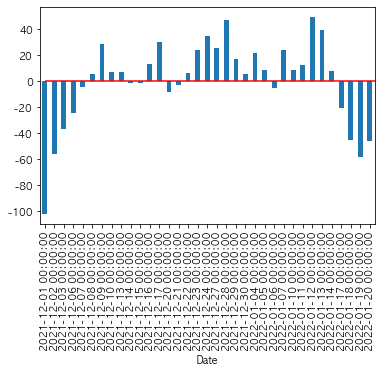

In [33]:
# 잔차 시각화
fitted_model.resid.plot(kind='bar')
plt.hlines(y=0, xmin=0, xmax=42, colors='red') #잔차는 0을 기준으로 생성되기 때문에 y=0의 선을 그어준다. (기준선 역할)
plt.show()

### 2-1 오차항의 등분산성

In [34]:
# yhat은 model 형성을 하면서 feature를 넣고 도출된 회귀값들임
yhat = fitted_model.fittedvalues
subset = pd.concat([yhat, target, fitted_model.resid], axis=1)
subset.columns = ['yhat', 'target', 'model_residual']

# 따라서 yhat, 전체형법범죄 데이터의 차이는 잔차 값으로 남아있음. (컬럼 자체를 연산하지 않았지만, 연산 결과는 잔차와 동일함)
# subset

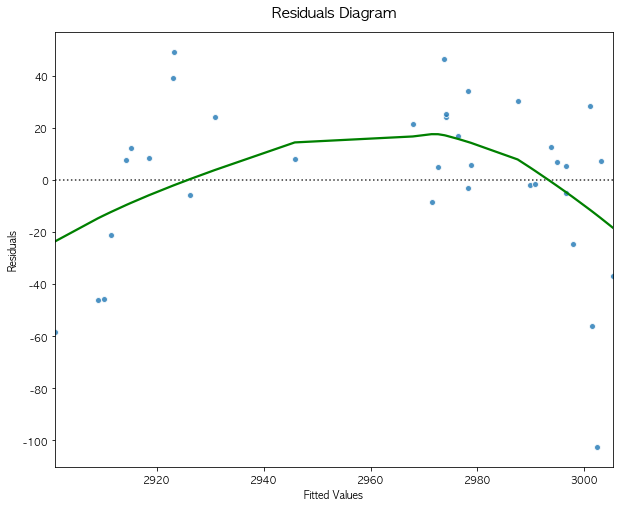

In [35]:
# 오차항의 등분산성을 확인하기 위한 플롯 형성
fig = plt.figure(figsize= (10,8))

# yhat값의 변화에 따라 오차항이 어떻게 변화하는지 육안으로 확인하는 부분 (등분산성은 yhat값과 무관하게 일정한 분산을 유지하는 형태로 도출됨)
sns.residplot(x = "yhat", y = "target", 
              data = subset, scatter_kws = {'edgecolor':"white"},
              lowess = True, line_kws = {"color":"green"})
plt.title("Residuals Diagram", fontsize=15, y=1.02)
plt.xlabel("Fitted Values")  
plt.ylabel("Residuals")
plt.show()

In [36]:
# 하나씩 시행해보기
from statsmodels.compat import lzip
import statsmodels.stats.api as sm

#perform Bresuch-Pagan test
names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
test = sm.het_breuschpagan(fitted_model.resid, fitted_model.model.exog)

# 독립변수, featue의 values (endog는 y값)
# fitted_model.model.exog

for i in lzip(names, test):
    print(f'{i[0]} : {i[1] : .3f}')
# which assumes independent and identically distributed
# error terms, or the original Breusch-Pagan version which assumes
# residuals are normally distributed.

# The null hypothesis (H0): Homoscedasticity is present.

Lag_range multiplier statistic :  0.085
p-value :  0.959
f-value :  0.039
f p-value :  0.962


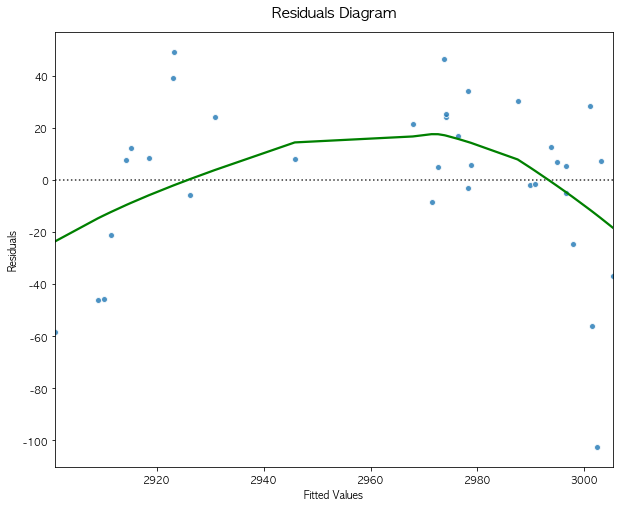

Lag_range multiplier statistic :  0.085
p-value :  0.959
f-value :  0.039
f p-value :  0.962
오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 5.0%에서 기각하지 못합니다.


In [37]:
def bp_test(fitted_model, sig_level):
    # 라이브러리 호출
    from statsmodels.compat import lzip
    from statsmodels.stats.api import het_breuschpagan
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 변수설정
    yhat = fitted_model.fittedvalues
    subset = pd.concat([yhat, target], axis=1)
    subset.columns = ['yhat', 'target']
    names = ['Lag_range multiplier statistic', 'p-value','f-value', 'f p-value']
    test = het_breuschpagan(fitted_model.resid, fitted_model.model.exog)
    
    # 오차항의 등분산성을 확인하기 위한 플롯 형성
    fig = plt.figure(figsize= (10,8))
    sns.residplot(x = "yhat", y = "target", 
                data = subset, scatter_kws = {'edgecolor':"white"},
                lowess = True, line_kws = {"color":"green"})
    plt.title("Residuals Diagram", fontsize=15, y=1.02)
    plt.xlabel("Fitted Values")  
    plt.ylabel("Residuals")
    plt.show()

    for i in lzip(names, test):
        print(f'{i[0]} : {i[1] : .3f}')
        
    if test[1] > sig_level:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 등분산(Homoscedasticity)을 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        print(f'오차항이 이분산(Heteroscedasticity)을 따르므로 선형회귀 모형의 가정에 어긋납니다.')

bp_test(fitted_model, 0.05)

In [38]:
# 이분산 검정 추가 (white test)
from statsmodels.stats.api import het_white

labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

white_test = het_white(fitted_model.resid, fitted_model.model.exog)

print(dict(zip(labels, white_test)))

# Null (H0): Homoscedasticity is present (residuals are equally scattered)
# Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

{'Test Statistic': 2.7924672516861158, 'Test Statistic p-value': 0.5931336987679692, 'F-Statistic': 0.6502672698125969, 'F-Test p-value': 0.6311405900713334}


### 2-2 오차항의 독립성

In [39]:
# 한줄씩 해보기
# 더빈왓슨 통계 (DW-test)
# 오차항의 독립성 검정으로 귀무가설은 '오차항이 독립적이다.'이다.
# statsmodel에서 도출한 OLS summary에서도 DW 값이 나오는데 2에 인접하는 경우, 오차항의 상관관계가 없는 것으로 나온다.
from statsmodels.stats.stattools import durbin_watson

durbin_watson(resids=fitted_model.resid)

0.3954617434637595

In [40]:
# 한줄씩 해보기
# 잔차 정의
resids=fitted_model.resid
# DW 통계치를 구하는 공식 적용 (시차 1 적용)
diff_resids = np.diff(resids, 1, axis=0)
dw = np.sum(diff_resids**2, axis=0) / np.sum(resids**2, axis=0)
# dw 통계치 도출 완료
dw

0.3954617434637595

#### DW 검정에 대한 설명
The test statistic is approximately equal to 2*(1-r) where ``r`` is the
sample autocorrelation of the residuals. Thus, for r == 0, indicating no
serial correlation, the test statistic equals 2. This statistic will
always be between 0 and 4. The closer to 0 the statistic, the more
evidence for positive serial correlation. The closer to 4, the more
evidence for negative serial correlation.

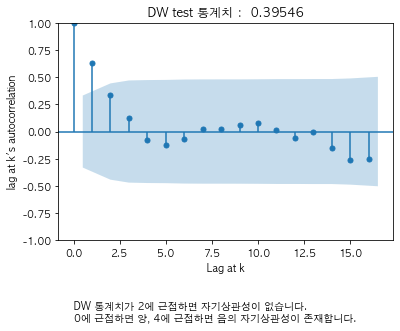

In [41]:
def autocorr_resid(fitted_model):
    from statsmodels.graphics.tsaplots import plot_acf
    import matplotlib.pyplot as plt
    from statsmodels.stats.stattools import durbin_watson

    # 오차항의 자기상관성 검정
    plot_acf(fitted_model.resid)
    plt.xlabel('Lag at k')
    plt.ylabel("lag at k's autocorrelation")
    plt.title(f'DW test 통계치 : {durbin_watson(resids=fitted_model.resid) : .5f}')
    plt.text(y=-1.75,x=0, s='DW 통계치가 2에 근접하면 자기상관성이 없습니다.\n0에 근접하면 양, 4에 근접하면 음의 자기상관성이 존재합니다.')
    plt.show()

autocorr_resid(fitted_model)   

### 2-3. 오차항의 정규성

In [42]:
# 정규성 검정 (귀무가설 : 정규성를 따른다)
from scipy.stats import jarque_bera

statistic, pvalue = jarque_bera(fitted_model.resid)
print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')

검정통계치 :  9.78176
p값 :  0.00751


/Users/jeong-giho/Desktop/financial_python/finance/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


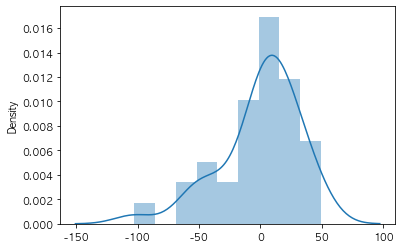

In [43]:
# 오차항 시각화
sns.distplot(fitted_model.resid)
plt.show()

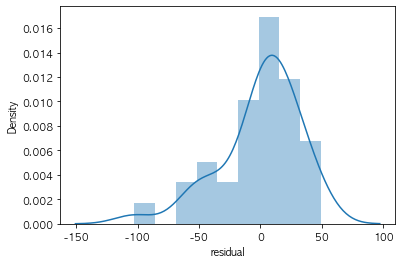

검정통계치 :  9.78176
p값 :  0.00751
오차항이 정규분포를 따른다는 귀무가설을 유의수준 5.0%에서 기각합니다.


In [44]:
def normal_test(fitted_model, sig_level):
    # 정규성 검정 (귀무가설 : 정규성를 따른다)
    from scipy.stats import jarque_bera
    import seaborn as sns
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    sns.distplot(fitted_model.resid)
    plt.xlabel('residual')
    plt.show()
    
    statistic, pvalue = jarque_bera(fitted_model.resid)
    print(f'검정통계치 : {statistic : .5f}\np값 : {pvalue : .5f}')
    if pvalue > sig_level:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각하지 못합니다.')
    else:
        print(f'오차항이 정규분포를 따른다는 귀무가설을 유의수준 {sig_level * 100}%에서 기각합니다.')
        
normal_test(fitted_model, .05)


## 3. 변수선택법

### 3-1. 전진선택법

In [68]:
# 하나씩 해보기
## 전진 단계별 선택법

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 변수 설정
target = stock_price['Adj Close']['^KS11']
ks11 = []
ks11.append([stock_price.columns[5*i+4] for i in range(6)])
feature = stock_price.drop(columns=ks11[0])
variables = feature.columns.tolist()
y = target

# 선택된 변수들 list 생성
forward_valriables = []

# 전진선택시 P 값을 고려할 때, 선택과 제거 임계치 설정    
sl_enter = 0.05
sl_remove = 0.05

# 각 스텝별로 선택된 변수들
sv_per_step = [] 
# 각 스텝별 수정된 결정계수
adj_r_squared_list = []
# 스텝
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[forward_valriables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit(disp=0)
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = feature[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_valriables.copy())
    else:
        break

In [70]:
# 최종 모형 도출
X = sm.add_constant(stock_price[forward_valriables])
model = sm.OLS(y, X).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     81.12
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           9.03e-15
Time:                        16:28:00   Log-Likelihood:                -146.38
No. Observations:                  35   AIC:                             300.8
Df Residuals:                      31   BIC:                             307.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        734.6837    187.354      3.921      0.000     352.572    1116.795
('Low', '035420.KS')           0.0020      0.000     12.997      0.000       0.002       0.002
('Adj Close', '005930.KS')     0.0190      0.002      8.846      0.000       0.015       0.023
('Volume', '035420.KS')     4.902e-05   1.42e-05      3.464      0.002    2.02e-05    7.79e-05
==============================================================================
Omnibus:                        1.774   Durbin-Watson:                   0.875
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.618
Skew:                           0.422   Prob(JB):                        0.445
Kurtosis:                       2.369   Cond. No.                     4.67e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

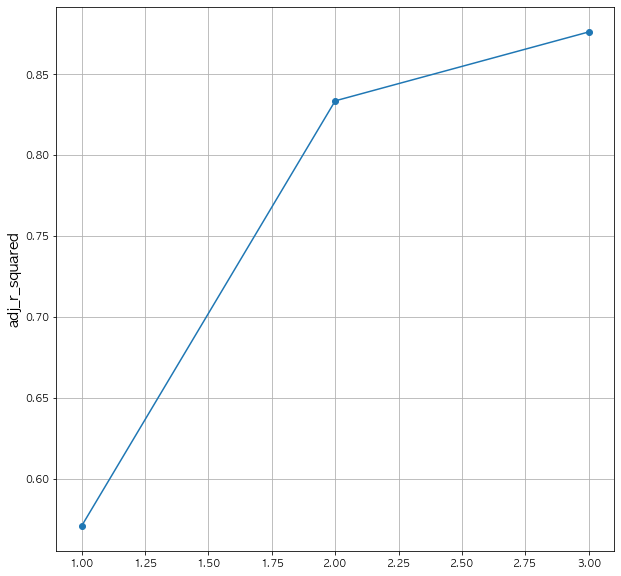

In [86]:
# 스텝별로 조정된 결정계수를 출력하는 표 시각화
fig = plt.figure(figsize=(10,10))
plt.plot(steps, adj_r_squared_list, marker='o')
plt.ylabel('adj_r_squared',fontsize=15)
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     81.12
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           9.03e-15
Time:                        16:36:39   Log-Likelihood:                -146.38
No. Observations:                  35   AIC:                             300.8
Df Residuals:                      31   BIC:                             307.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

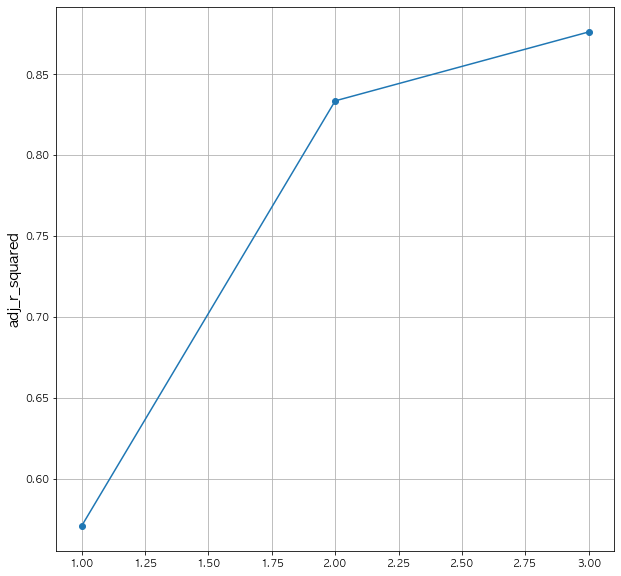

In [89]:
def forward_feature_selection(feature, target, sl_enter=.05, sl_remove=.05):
    ## 전진 단계별 선택법

    import statsmodels.api as sm
    import pandas as pd
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    # 변수 설정
    variables = feature.columns.tolist() 
    # 선택된 변수들 list 생성
    forward_valriables = []
    # 각 스텝별로 선택된 변수들
    sv_per_step = [] 
    # 각 스텝별 수정된 결정계수
    adj_r_squared_list = []
    # 스텝
    steps = []
    step = 0

    while len(variables) > 0:
        remainder = list(set(variables) - set(forward_valriables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[forward_valriables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(target,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            forward_valriables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(forward_valriables) > 0:
                selected_X = feature[forward_valriables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(target,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    forward_valriables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(target,sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
            adj_r_squared_list.append(adj_r_squared)
            sv_per_step.append(forward_valriables)
        else:
            break

    # 최종 모형 도출
    model = sm.OLS(target, sm.add_constant(stock_price[forward_valriables])).fit(disp=0)
    print(model.summary())

    # 스텝별로 조정된 결정계수를 출력하는 표 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()
    
    return model
    
forward_model = forward_feature_selection(feature, target)

### 3-2 후진제거법

                            OLS Regression Results                            
Dep. Variable:                  ^KS11   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     67.18
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           4.24e-14
Time:                        16:36:52   Log-Likelihood:                -118.89
No. Observations:                  35   AIC:                             265.8
Df Residuals:                      21   BIC:                             287.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

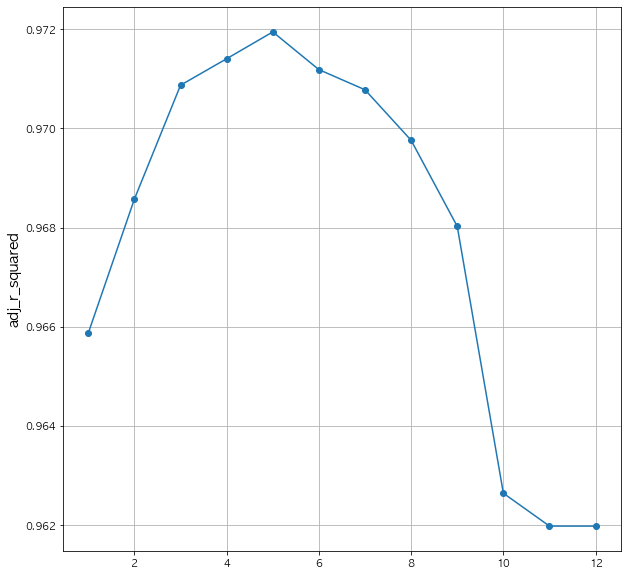

In [91]:
def backward_regression(feature, target,
                           initial_list=[], 
                           threshold_out = 0.05):
    
    import matplotlib.pyplot as plt
    import statsmodels.api as sm
    import pandas as pd
    import warnings
    warnings.filterwarnings("ignore")
    
    feature_list = feature.columns.tolist()  
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adj_r_squared_list = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    included = feature.columns.tolist() 
    
    while True:
        changed=False
        model = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0)
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # 각 feature의 P값을 의미함
        worst_pval = pvalues.max()	# P 값이 가장 높은 것 선정
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        
        step += 1
        steps.append(step)        
        adj_r_squared = sm.OLS(target, sm.add_constant(feature[included])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(included.copy())
        if not changed:
            break
    
    # 최종모델 출력
    model = sm.OLS(target, sm.add_constant(feature[included])).fit()
    print(model.summary())

    
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('adj_r_squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

backward_model = backward_regression(feature, target)

### 3-3 단계적 선택법

                            OLS Regression Results                            
Dep. Variable:                  ^KS11   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     81.12
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           9.03e-15
Time:                        16:37:01   Log-Likelihood:                -146.38
No. Observations:                  35   AIC:                             300.8
Df Residuals:                      31   BIC:                             307.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

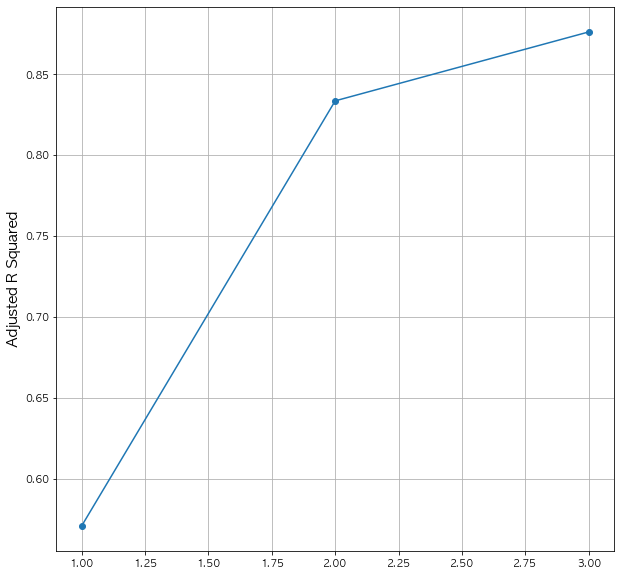

In [92]:
def stepwise_feature_selection(feature, target, variables=feature.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    model = sm.OLS(y, sm.add_constant(feature[selected_variables])).fit()
    print(model.summary())
    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps,adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared',fontsize=15)
    plt.grid(True)
    plt.show()

    return model

stepwise_model = stepwise_feature_selection(feature, target)